In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data =pd.read_csv('https://raw.githubusercontent.com/sam16tyagi/Machine-Learning-techniques-in-python/master/logistic%20regression%20dataset-Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape

(400, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [6]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<AxesSubplot:>

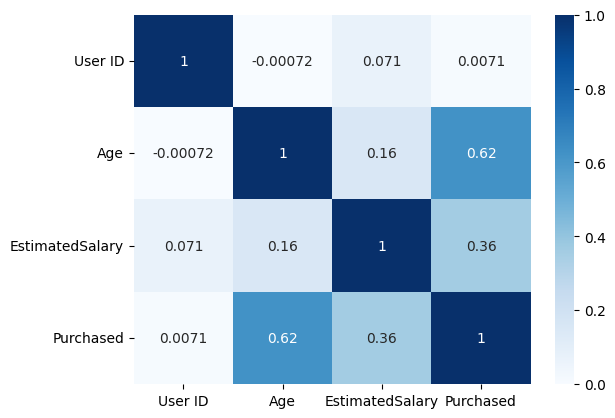

In [7]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')

<AxesSubplot:xlabel='Gender', ylabel='count'>

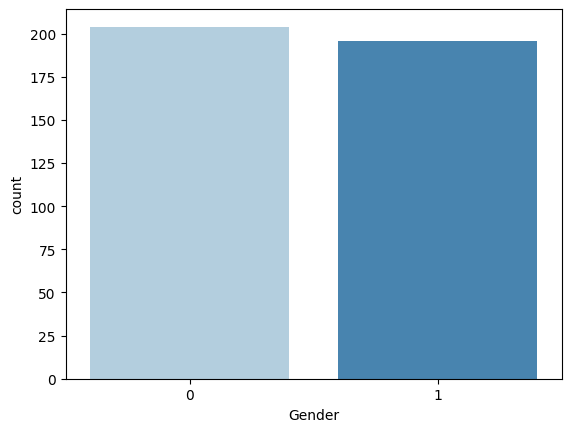

In [46]:
sns.countplot(data['Gender'],palette='Blues')

<AxesSubplot:xlabel='Gender', ylabel='Purchased'>

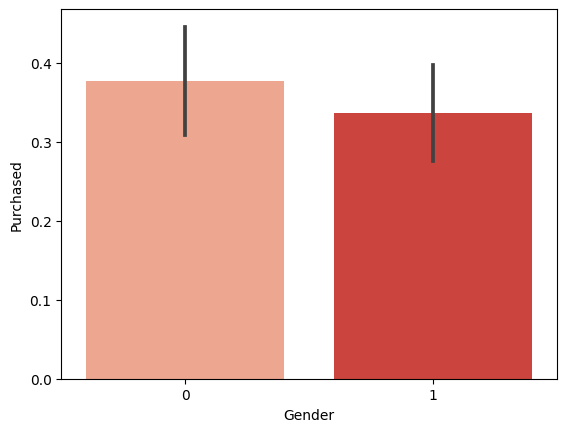

In [47]:
sns.barplot(x='Gender',y='Purchased',data=data,palette='Reds')

In [10]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [12]:
#duplicate values in each columns
data['User ID'].duplicated().sum(),data['Gender'].duplicated().sum(),data['Age'].duplicated().sum(),data['EstimatedSalary'].duplicated().sum(),data['Purchased'].duplicated().sum()

(0, 398, 357, 283, 398)

In [13]:
#convert gender into numerical
from sklearn.preprocessing import LabelEncoder
num = LabelEncoder()
data['Gender'] = num.fit_transform(data['Gender'])

In [14]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [15]:
cols = ['User ID', 'Gender', 'Age', 'EstimatedSalary']

In [16]:
x = data[cols].values
y = data['Purchased'].values.reshape(-1,1)

In [17]:
x.shape,y.shape

((400, 4), (400, 1))

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')
classifier.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [20]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [21]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
..     ...        ...
75       0          0
76       0          0
77       0          0
78       1          0
79       1          1

[80 rows x 2 columns]


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[56,  2],
       [12, 10]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,y_pred)*100
a

82.5

### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

In [25]:
y_predicted = clf.predict(x_test)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [26]:
pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_predicted.squeeze()})
print(pred)

    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
..     ...        ...
75       0          0
76       0          0
77       0          0
78       1          1
79       1          0

[80 rows x 2 columns]


In [27]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[56,  2],
       [12, 10]], dtype=int64)

In [28]:
#accuracy
b=metrics.accuracy_score(y_test, y_predicted)*100
b

<IPython.core.display.Javascript object>

88.75

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=25)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=25)

In [30]:
y_predicts = model.predict(x_test)
y_predicts

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicts)

array([[54,  4],
       [ 1, 21]], dtype=int64)

In [32]:
predict = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_predicts.squeeze()})
print(predict)

    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
..     ...        ...
75       0          0
76       0          0
77       0          0
78       1          1
79       1          1

[80 rows x 2 columns]


In [33]:
from sklearn.metrics import accuracy_score
c = accuracy_score(y_test,y_predicts)*100
c

93.75

### SVM 

In [34]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [35]:
y_predictions = svclassifier.predict(x_test)
y_predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [36]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_predictions.squeeze()})
print(df_preds)

    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
..     ...        ...
75       0          0
76       0          0
77       0          0
78       1          0
79       1          1

[80 rows x 2 columns]


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test,y_predictions)

array([[56,  2],
       [13,  9]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
d =accuracy_score(y_test,y_predictions)*100
d

81.25

### Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
models = GaussianNB()
models.fit(x_train,y_train)

GaussianNB()

In [41]:
y_prd = model.predict(x_test)
y_prd

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [44]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_prd.squeeze()})
print(df_preds)

    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
..     ...        ...
75       0          0
76       0          0
77       0          0
78       1          1
79       1          1

[80 rows x 2 columns]


In [42]:
e = accuracy_score(y_test,y_prd)*100
e

93.75

In [43]:
Accuracy = pd.DataFrame({'Logistic':a,'Decision Tree':b,'Random Forest':c,"SVM":d,"Naive Bayes":e},index=[0])
Accuracy

,Logistic,Decision Tree,Random Forest,SVM,Naive Bayes
0,82.5,88.75,93.75,81.25,93.75


### Random Forest and Naive Bayes Gives best accuracy